# Software Defect Classification with Ensemble Learning on Selected Features
An implementation for the research paper <a href='https://www.researchgate.net/publication/264459812_Software_Defect_Prediction_using_Ensemble_Learning_on_Selected_Features'>Software Defect Prediction using Ensemble Learning on Selected Features</a>

#### Done By: Mohammed Abed
#### Supervisor: Dr. Lahouari Ghouti
#### Prince Sultan Univesrity

<h2><center><strong>Multinomial Naive Bayes</strong></center></h2>

## Import Libraries

In [1]:
import pandas as pd
from scipy.io import arff
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux

## Load and Explore Data

In [2]:
DATASET_PATH = 'datasets/ant-1.7.csv'

In [3]:
ant_df = pd.read_csv(DATASET_PATH)

In [4]:
ant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     745 non-null    object 
 1   version  745 non-null    float64
 2   name.1   745 non-null    object 
 3   wmc      745 non-null    int64  
 4   dit      745 non-null    int64  
 5   noc      745 non-null    int64  
 6   cbo      745 non-null    int64  
 7   rfc      745 non-null    int64  
 8   lcom     745 non-null    int64  
 9   ca       745 non-null    int64  
 10  ce       745 non-null    int64  
 11  npm      745 non-null    int64  
 12  lcom3    745 non-null    float64
 13  loc      745 non-null    int64  
 14  dam      745 non-null    float64
 15  moa      745 non-null    int64  
 16  mfa      745 non-null    float64
 17  cam      745 non-null    float64
 18  ic       745 non-null    int64  
 19  cbm      745 non-null    int64  
 20  amc      745 non-null    float64
 21  max_cc   745 non

In [5]:
ant_df.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.700000e+00,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,...,0.644855,0.726174,0.509968,0.474685,0.720805,1.312752,23.640870,4.669799,1.366053,0.453691
std,2.377473e-14,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,...,0.438138,1.426581,0.398696,0.259931,0.938948,2.332602,76.986079,6.276853,0.881739,1.138673
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000e+00,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,9.066667,1.000000,0.857100,0.000000
50%,1.700000e+00,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,...,1.000000,0.000000,0.681818,0.437500,0.000000,0.000000,16.400000,3.000000,1.142900,0.000000
75%,1.700000e+00,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,...,1.000000,1.000000,0.869919,0.666667,1.000000,2.000000,28.000000,6.000000,1.666700,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,...,1.000000,11.000000,1.000000,1.000000,5.000000,19.000000,2052.000000,53.000000,6.777800,10.000000


In [6]:
ant_df

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.7,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,...,0.000000,0,0.000000,0.444444,0,0,32.666667,1,0.6667,0
1,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,...,1.000000,1,0.700000,0.500000,0,0,13.400000,1,0.6000,0
2,ant,1.7,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,...,0.000000,0,1.000000,1.000000,0,0,6.000000,0,0.0000,0
3,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,8,1,9,13,20,12,9,...,0.200000,1,0.000000,0.406250,0,0,11.000000,1,0.8750,0
4,ant,1.7,org.apache.tools.ant.taskdefs.WaitFor,9,3,0,5,26,16,0,...,1.000000,0,0.800000,0.388889,0,0,19.000000,2,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,ant,1.7,org.apache.tools.ant.taskdefs.Javadoc,92,3,0,34,261,3726,8,...,0.970588,11,0.291339,0.112476,2,2,28.021739,15,1.5543,4
741,ant,1.7,org.apache.tools.ant.types.selectors.BaseSelector,6,3,6,10,10,3,7,...,1.000000,0,0.857143,0.500000,0,0,6.500000,3,1.5000,0
742,ant,1.7,org.apache.tools.ant.types.resources.selectors...,7,3,5,9,26,0,5,...,1.000000,0,0.857143,0.314286,1,3,19.000000,3,1.5714,0
743,ant,1.7,org.apache.tools.ant.taskdefs.compilers.Gcj,5,2,0,8,34,8,1,...,1.000000,0,0.884615,1.000000,0,0,42.000000,11,3.4000,1


### Correlation Matrix

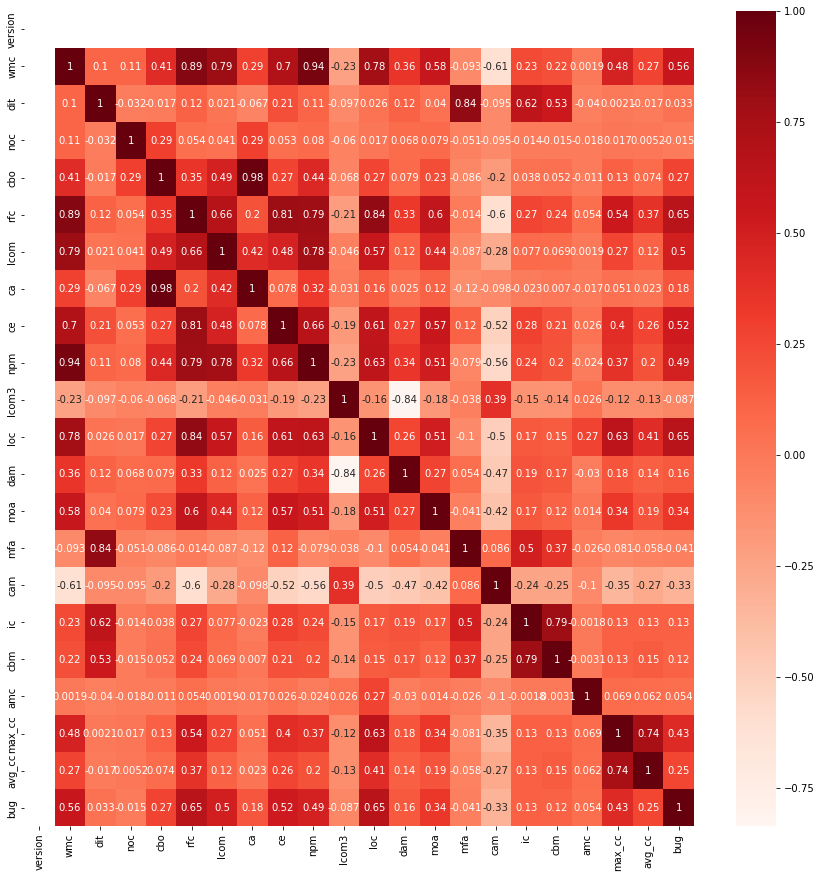

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = ant_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Target Frequency

<AxesSubplot:xlabel='bug', ylabel='count'>

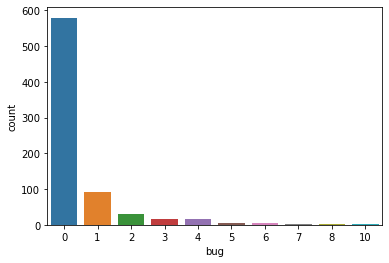

In [8]:
sns.countplot(x = 'bug', data = ant_df)

As it is a binary classifier, the target must be 0 and 1 which means that target greater than 0 will be considered as 1

## Data Cleaning

### Drop unnecessary Columns

In [9]:
ant_df = ant_df.drop(columns = ['name', 'version', 'name.1'], axis = 1)

### Check Missing Values

In [10]:
def check_missing(df):
    df.isnull().sum()
    missing_count = df.isnull().sum() # the count of missing values
    value_count = df.isnull().count() # the count of all values 
    missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
    missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
    return missing_df

In [11]:
check_missing(ant_df)

,count,percentage
wmc,0,0.0
dit,0,0.0
noc,0,0.0
cbo,0,0.0
rfc,0,0.0
lcom,0,0.0
ca,0,0.0
ce,0,0.0
npm,0,0.0
lcom3,0,0.0


### Clean from NaN and Null Values

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
clean_dataset(ant_df)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3.0,1.0,0.0,10.0,18.0,3.0,1.0,9.0,1.0,1.100000,...,0.000000,0.0,0.000000,0.444444,0.0,0.0,32.666667,1.0,0.6667,0.0
1,5.0,2.0,0.0,4.0,13.0,0.0,1.0,4.0,4.0,0.625000,...,1.000000,1.0,0.700000,0.500000,0.0,0.0,13.400000,1.0,0.6000,0.0
2,1.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,2.000000,...,0.000000,0.0,1.000000,1.000000,0.0,0.0,6.000000,0.0,0.0000,0.0
3,8.0,1.0,9.0,13.0,20.0,12.0,9.0,4.0,8.0,0.800000,...,0.200000,1.0,0.000000,0.406250,0.0,0.0,11.000000,1.0,0.8750,0.0
4,9.0,3.0,0.0,5.0,26.0,16.0,0.0,5.0,7.0,0.750000,...,1.000000,0.0,0.800000,0.388889,0.0,0.0,19.000000,2.0,1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,92.0,3.0,0.0,34.0,261.0,3726.0,8.0,34.0,81.0,0.960246,...,0.970588,11.0,0.291339,0.112476,2.0,2.0,28.021739,15.0,1.5543,4.0
741,6.0,3.0,6.0,10.0,10.0,3.0,7.0,3.0,6.0,0.400000,...,1.000000,0.0,0.857143,0.500000,0.0,0.0,6.500000,3.0,1.5000,0.0
742,7.0,3.0,5.0,9.0,26.0,0.0,5.0,4.0,6.0,0.000000,...,1.000000,0.0,0.857143,0.314286,1.0,3.0,19.000000,3.0,1.5714,0.0
743,5.0,2.0,0.0,8.0,34.0,8.0,1.0,7.0,3.0,0.500000,...,1.000000,0.0,0.884615,1.000000,0.0,0.0,42.000000,11.0,3.4000,1.0


### Convert Target to Binary

In [14]:
def convert_target_binary(df):
    df['bug'] = df['bug'].map(
                       {0:0 , 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1 })

convert_target_binary(ant_df)

### Visualize Cleaned Data

In [15]:
ant_df

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3,1,0,10,18,3,1,9,1,1.100000,...,0.000000,0,0.000000,0.444444,0,0,32.666667,1,0.6667,0
1,5,2,0,4,13,0,1,4,4,0.625000,...,1.000000,1,0.700000,0.500000,0,0,13.400000,1,0.6000,0
2,1,2,0,1,3,0,0,1,1,2.000000,...,0.000000,0,1.000000,1.000000,0,0,6.000000,0,0.0000,0
3,8,1,9,13,20,12,9,4,8,0.800000,...,0.200000,1,0.000000,0.406250,0,0,11.000000,1,0.8750,0
4,9,3,0,5,26,16,0,5,7,0.750000,...,1.000000,0,0.800000,0.388889,0,0,19.000000,2,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,92,3,0,34,261,3726,8,34,81,0.960246,...,0.970588,11,0.291339,0.112476,2,2,28.021739,15,1.5543,1
741,6,3,6,10,10,3,7,3,6,0.400000,...,1.000000,0,0.857143,0.500000,0,0,6.500000,3,1.5000,0
742,7,3,5,9,26,0,5,4,6,0.000000,...,1.000000,0,0.857143,0.314286,1,3,19.000000,3,1.5714,0
743,5,2,0,8,34,8,1,7,3,0.500000,...,1.000000,0,0.884615,1.000000,0,0,42.000000,11,3.4000,1


## Data Split

In [16]:
# set target
target = 'bug'

In [17]:
# set all columns other than the target for X
X = ant_df.loc[:, ant_df.columns!=target]
y = ant_df.loc[:, ant_df.columns==target]

In [18]:
y.value_counts()

bug
0      579
1      166
dtype: int64

<AxesSubplot:xlabel='bug', ylabel='count'>

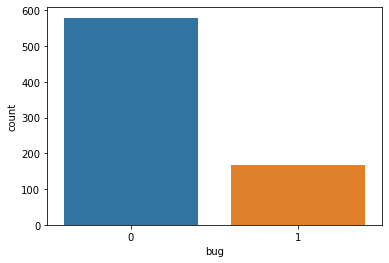

In [19]:
sns.countplot(x = 'bug', data = ant_df)

The data is imbalanced which will result in many problems that negatively affects the model such as Overfitting and low model performance.

This will be solved later on.

## Train / Test Split

Mainly there will be no need for splitting the data as the model will be trained using `Stratified K Fold CV` in order to overcome classes imbalance.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )

In [21]:
print('Training Set: ', X_train.shape[0])
print('Testing Set: ', X_test.shape[0])

Training Set:  558
Testing Set:  187


## Model Training Pipeline
* Feature Selection
* Scaler
* Classifier
* Grid Search CV

In [22]:
! pip install mlxtend

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statistics import mean, stdev

### Piepline Structure

As we are using MNB it doesnt accept negative values which means that we should ensure that our values are positive. To do so, we will use `MinMaxScaler` instead of the `StandardScaler`

Also, in order to use the model for predictions later on in the APE the loss must be set to `log` instead of `hinge`

In [37]:
# Data will be scaled with Standard Scaler first
scaler = MinMaxScaler()

# Feature selection will be applied with 10 - 15 features
sfs = SFS(estimator=MultinomialNB(), 
           k_features=10,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=2)

# Logisitc Regression classifier is trained
clf = MultinomialNB()

TypeError: __init__() got an unexpected keyword argument 'probability'

In [31]:
steps = [
    ('sfs', sfs), 
    ('scaler', scaler), 
    ('rf', clf)
]

pipeline = Pipeline(steps)

### Hyperparameters Tuning

In [32]:
# Hyperparameters for GridSearch CV
grid_params = [{
'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         
}] 

In [33]:
search = GridSearchCV(pipeline, grid_params, cv = 4)

### Stratified K Fold CV
Since the data is imbalanced, there should be a solution for this isue. Mainly there are two soultions:
* Data Resample with `SMOTE`
* `Stratified K Fold CV`

According to the paper and to main AI articles the `Stratified K Fold CV` is the optimal solution to overcome this issue.

In [34]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold.values.ravel())
    # Save scores in the list
    lst_accu_stratified.append(pipeline.score(X_test_fold, y_test_fold))
    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))    

List of possible accuracy: [0.8074866310160428, 0.8172043010752689, 0.8064516129032258, 0.7741935483870968]

Maximum Accuracy That can be obtained from this model is: 81.72043010752688 %

Minimum Accuracy: 77.41935483870968 %

Overall Accuracy: 80.13340233454085 %

Standard Deviation is: 0.01873068249527743


## Save Model

In [35]:
import pickle

pickle.dump(pipeline, open('models/mnb.sav', 'wb'))